#   Deseret Optical Character Recognition

Parts of this analysis draw on [Olarik Surinta's “Basic Character Recognition Tutorial”](https://medium.com/olarik/basic-character-recognition-tutorial-9f55ff030f1c).

##  Crop characters from images.

In [1]:
from skimage import io
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 30)

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi
from skimage import transform
from skimage import img_as_ubyte

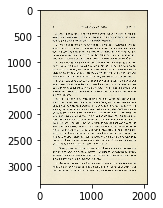

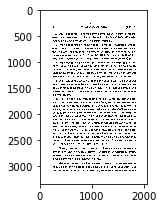

Number of Dimensions: 2
Number of Objects: 3575


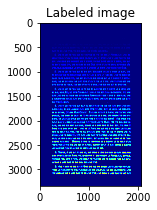

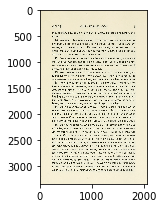

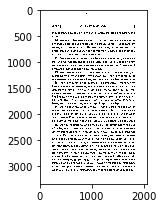

Number of Dimensions: 2
Number of Objects: 2700


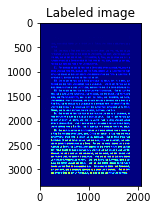

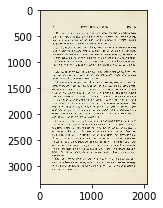

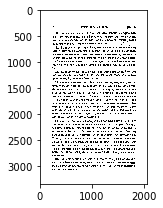

Number of Dimensions: 2
Number of Objects: 3898


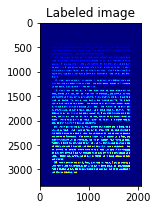

/tmp/ipykernel_1830105/2358734904.py:55: UserWarning: ./chars/p2-c654.png is a low contrast image
  io.imsave(f'./chars/p{fileindex}-c{cnt}.png', tmp_img)


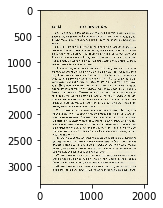

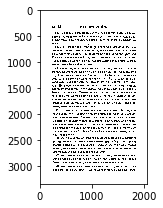

Number of Dimensions: 2
Number of Objects: 3320


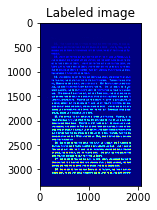

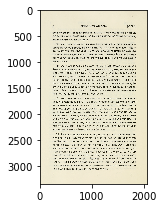

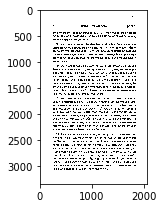

Number of Dimensions: 2
Number of Objects: 3270


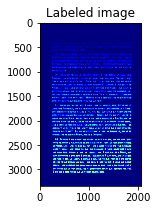

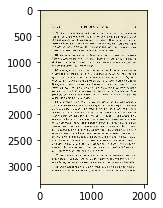

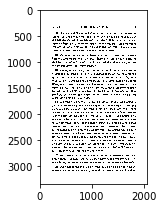

Number of Dimensions: 2
Number of Objects: 2981


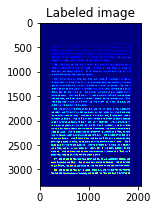

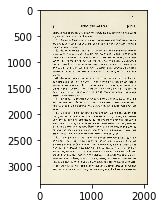

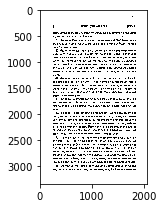

Number of Dimensions: 2
Number of Objects: 2714


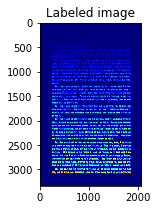

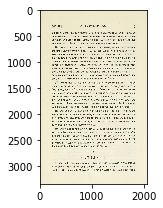

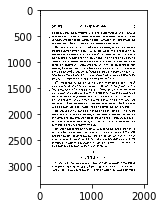

Number of Dimensions: 2
Number of Objects: 4366


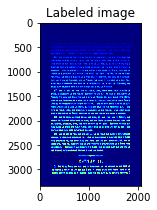

ValueError: zero-size array to reduction operation minimum which has no identity

In [3]:
from glob import glob

filenames = sorted(glob('./source/bookofmormdeseretalpha00_jp2/*.png'))

training_filenames = filenames[16:32]

for fileindex,filename in enumerate(training_filenames):
    page = io.imread(filename)
    io.imshow(page)
    io.show()

    # convert image to binary image
    from skimage import filters, color

    gray_image = color.rgb2gray(page)
    thresh = filters.threshold_mean(gray_image)
    binary_image = gray_image > thresh

    io.imshow(binary_image.astype(float))
    io.show()

    print("Number of Dimensions:", binary_image.ndim)
    
    # chop into pieces, as yet unlabeled.
    label_objects, nb_labels = ndi.label(np.invert(binary_image))
    print("Number of Objects:", nb_labels)

    plt.subplots(ncols=1, nrows=1)
    plt.imshow(label_objects, cmap=plt.cm.jet)
    plt.title("Labeled image")
    plt.show()
    
    # define size of the digit
    img_row = 32
    img_col = 32
    # define class of the digit
    img_class = 1

    #show crop image
    mpl.rcParams['figure.figsize'] = (3,3)
    for cnt in range(1,nb_labels):
        tmp = label_objects == cnt
        r, = np.where(tmp.sum(axis=1) > 1)
        c, = np.where(tmp.sum(axis=0) > 1)
        if (r.size < 10) or (c.size < 10): continue
        if (c.size/r.size > 1.0): continue  # multiple chars
        # some commas and punctuation still slip through, as do digits

        # crop with border
        tmp_img = gray_image[(r.min()-1):(r.max()+2), (c.min()-1):(c.max()+2)]
        #digit_x = transform.resize(tmp_img, (img_row,img_col), mode='reflect')
        tmp_img = img_as_ubyte(tmp_img)

        #io.imshow(tmp_img)
        io.imsave(f'./chars/p{fileindex}-c{cnt}.png', tmp_img)
        plt.show()

In [54]:
tmp = label_objects == cnt
r, = np.where(tmp.sum(axis=1) > 1)
c, = np.where(tmp.sum(axis=0) > 1)

r,c

(array([1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203,
        1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214,
        1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223]),
 array([1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795,
        1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806,
        1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817,
        1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828]))

In [45]:
label_objects == 1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])